In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import plotly.express as px
from math import pi

In [ ]:
probabilities = pd.read_table("mplus_analysis/4_class_probabilities.dat", sep="\s+", header=None)
person_data = pd.read_csv("mplus_analysis/lca_data.csv")

In [ ]:
person_prob = pd.concat([probabilities[34], person_data], axis=1)
person_prob = person_prob.rename(columns={34:"Class"})
person_prob

,Class,Unnamed: 0,person_id,pct_fast_food,med_price,med_rating,diversity_food_cat,travel_time,rest_nonrest_trips,mode,...,black,race_other,income_1,income_2,income_3,income_4,full_time,part_time,homemaker,unemployed
0,2.0,0,1710194701,0.000000,2.0,3.90,5.0,15.0,0.166667,1,...,0,0,0,1,0,0,1,0,0,0
1,2.0,1,1710194901,0.000000,2.0,4.00,4.0,8.0,0.952381,1,...,0,0,0,0,0,1,1,0,0,0
2,3.0,2,1710194902,0.166667,2.0,3.70,6.0,15.0,0.203390,5,...,0,0,0,0,0,1,1,0,0,0
3,2.0,4,1710210901,0.000000,1.0,3.30,1.0,12.5,0.250000,5,...,0,0,0,0,1,0,0,0,0,1
4,2.0,5,1710222701,0.076923,1.0,4.00,5.0,9.0,0.333333,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1.0,4043,19201830401,0.500000,2.0,2.70,4.0,9.0,0.095238,5,...,0,0,0,0,1,0,1,0,0,0
3146,2.0,4044,19201839701,0.000000,2.0,3.45,2.0,10.0,1.000000,5,...,0,0,0,0,1,0,1,0,0,0
3147,1.0,4045,19201839702,0.500000,2.0,3.55,2.0,10.0,1.000000,5,...,0,0,0,0,1,0,0,1,0,0
3148,1.0,4046,19201842501,0.500000,1.5,3.50,2.0,12.5,0.142857,1,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
# size of each class
person_prob.Class.value_counts()

Class
2.0    2043
3.0     573
1.0     461
4.0      73
Name: count, dtype: int64

# Looking only at covariates

In [5]:
person_prob_cov = pd.concat([person_prob.iloc[:, 11:], person_prob.iloc[:,0]], axis=1)

In [7]:
c_avgs = pd.DataFrame()
c_1 = person_prob_cov[person_prob_cov.Class == 1]
c_2 = person_prob_cov[person_prob_cov.Class == 2]
c_3 = person_prob_cov[person_prob_cov.Class == 3]
c_4 = person_prob_cov[person_prob_cov.Class == 4]

In [8]:
# reformat to get means
for col in c_1.columns:
#     print(c_1.col)
    c_avgs[col] = [c_1[col].mean(), c_2[col].mean(), c_3[col].mean(), c_4[col].mean()]
c_avgs.index += 1
c_avgs = c_avgs.iloc[:, :-1]

In [12]:
mult_rows = ["home_fd","age_1","age_2","age_3",
"age_4","age_5","male","female","gender_other","white","asian","hispanic","black","race_other",
"income_1","income_2","income_3","income_4","full_time","part_time","homemaker","unemployed"]
freq_table = c_avgs.T
# freq_table['nonfem'] = 
freq_table.loc[mult_rows] *= 100
freq_table = freq_table.round(2)
freq_table.loc[mult_rows] = freq_table.loc[mult_rows].astype(str) + "\%"

/var/folders/mg/5x982c514sl0dc5v1pd9gj580000gn/T/ipykernel_12868/3807876185.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['4.12\\%' '8.24\\%' '5.21\\%' '57.92\\%' '20.17\\%' '8.46\\%' '47.72\\%'
 '50.98\\%' '1.3\\%' '67.46\\%' '13.67\\%' '8.46\\%' '3.04\\%' '7.38\\%'
 '10.63\\%' '22.99\\%' '38.61\\%' '27.77\\%' '59.0\\%' '6.94\\%' '3.47\\%'
 '30.59\\%']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  freq_table.loc[mult_rows] = freq_table.loc[mult_rows].astype(str) + "\%"
/var/folders/mg/5x982c514sl0dc5v1pd9gj580000gn/T/ipykernel_12868/3807876185.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['2.99\\%' '6.02\\%' '6.27\\%' '56.98\\%' '21.0\\%' '9.74\\%' '49.34\\%'
 '49.58\\%' '1.08\\%' '65.83\\%' '18.06\\%' '5.19\\%' '3.18\\%' '7.73\\%'
 '10.08\\%' '24.47\\%' '37.05\\

In [ ]:
# change order of table
freq_table

,1,2,3,4
tod,2.78,2.8,2.83,2.78
rest_empl_pop,11080.93,10641.94,9842.18,11239.5
rest_inc,84090.83,84122.29,85950.44,80330.64
dist_from_home,4.4,3.9,4.1,4.56
home_fd,4.12\%,2.99\%,5.76\%,4.11\%
numchildren,0.53,0.38,0.42,0.45
veh_hh_ratio,0.71,0.67,0.68,0.6
age_1,8.24\%,6.02\%,5.58\%,6.85\%
age_2,5.21\%,6.27\%,7.68\%,9.59\%
age_3,57.92\%,56.98\%,61.95\%,50.68\%


# Radar Plots

In [38]:
# split up classes
c1 = person_prob[person_prob.Class==1]
c2 = person_prob[person_prob.Class==2]
c3 = person_prob[person_prob.Class==3]
c4 = person_prob[person_prob.Class==4]

In [ ]:
indicator_results = pd.read_excel("mplus_analysis/LPA_mplus_results.xlsx", sheet_name="indicator_results")
indicator_results

,Unnamed: 0,c1_mean,c1_p,c2_mean,c2_p,c3_mean,c3_p,c4_mean,c4_p
0,Fast Food,0.499,0.000,0.005,0.00,0.223,0.000,0.996,0.000
1,Price,1.438,0.000,1.823,0.00,1.696,0.000,1.144,0.000
2,Rating,3.156,0.000,3.792,0.00,3.637,0.000,2.491,0.000
3,Diversity,2.346,0.000,2.762,0.00,4.187,0.000,1.182,0.000
4,Travel time,1.403,0.000,1.356,0.00,1.176,0.000,1.523,0.000
5,Restaurant trip ratio,0.533,0.000,0.522,0.00,0.511,0.000,0.794,0.000
6,SOV,-0.291,0.013,-0.260,0.00,-0.518,0.000,-0.280,0.371
7,Walk,-0.212,0.065,0.362,0.00,-0.051,0.621,0.058,0.839
8,Transit,-2.319,0.000,-2.036,0.00,-2.496,0.000,-1.814,0.001
9,Shop,-0.417,0.081,-0.532,0.00,-1.146,0.000,-1.504,0.054


In [40]:
# slice df
indicator_results_sliced = indicator_results.iloc[:6,:]
indicator_results_sliced = indicator_results_sliced[["c1_mean", "c2_mean", "c3_mean", "c4_mean"]]
indicator_results_sliced["variable"] = ["fast_food", "price", "rating", "diversity", "travel_time", "restaurant_ratio"]

indicator_results_sliced

,c1_mean,c2_mean,c3_mean,c4_mean,variable
0,0.499,0.005,0.223,0.996,fast_food
1,1.438,1.823,1.696,1.144,price
2,3.156,3.792,3.637,2.491,rating
3,2.346,2.762,4.187,1.182,diversity
4,1.403,1.356,1.176,1.523,travel_time
5,0.533,0.522,0.511,0.794,restaurant_ratio


In [41]:
# normalize each row to maintain interpretable scale
indicator_results_sliced.iloc[1,:4] = indicator_results_sliced.iloc[1,:4]/4 # num dollar signs, $-$$$$
indicator_results_sliced.iloc[2,:4] = indicator_results_sliced.iloc[2,:4]/5 # num stars, 1-5
indicator_results_sliced.iloc[3,:4] = (indicator_results_sliced.iloc[3,:4]-1)/person_prob.diversity_food_cat.quantile(0.98) # 1-max num cuisines
indicator_results_sliced.iloc[4,:4] = (indicator_results_sliced.iloc[4,:4]*10 - person_prob.travel_time.min())/person_prob.travel_time.quantile(0.98) # min-max travel time

indicator_results_sliced

,c1_mean,c2_mean,c3_mean,c4_mean,variable
0,0.499000,0.005000,0.223000,0.996000,fast_food
1,0.359500,0.455750,0.424000,0.286000,price
2,0.631200,0.758400,0.727400,0.498200,rating
3,0.192286,0.251714,0.455286,0.026000,diversity
4,0.308462,0.296410,0.250256,0.339231,travel_time
5,0.533000,0.522000,0.511000,0.794000,restaurant_ratio


In [43]:
radar_input = indicator_results_sliced.T.iloc[:4,:].reset_index()
radar_input = radar_input.rename(columns={0:"fast_food", 1:"price", 2:"rating", 3:"diversity",
                                          4:"travel_time", 5:"restaurant_ratio"})
radar_input

,index,fast_food,price,rating,diversity,travel_time,restaurant_ratio
0,c1_mean,0.499,0.3595,0.6312,0.192286,0.308462,0.533
1,c2_mean,0.005,0.45575,0.7584,0.251714,0.29641,0.522
2,c3_mean,0.223,0.424,0.7274,0.455286,0.250256,0.511
3,c4_mean,0.996,0.286,0.4982,0.026,0.339231,0.794


In [ ]:
# add categorical data

# walking trips
radar_input["walking_trips"] = [(c1["mode"]==2).sum()/len(c1["mode"]), (c2["mode"]==2).sum()/len(c2["mode"]),
                                (c3["mode"]==2).sum()/len(c3["mode"]), (c4["mode"]==2).sum()/len(c4["mode"])]

radar_input

,index,fast_food,price,rating,diversity,travel_time,restaurant_ratio,walking_trips
0,c1_mean,0.499,0.3595,0.6312,0.192286,0.308462,0.533,0.305857
1,c2_mean,0.005,0.45575,0.7584,0.251714,0.29641,0.522,0.429271
2,c3_mean,0.223,0.424,0.7274,0.455286,0.250256,0.511,0.364747
3,c4_mean,0.996,0.286,0.4982,0.026,0.339231,0.794,0.356164


In [46]:
# make indicies prettier
radar_input = radar_input.rename(columns={"fast_food": "Fast Food", "price": "Price", 
                                         "rating": "Rating", "diversity": "Food Diversity", "travel_time": "Travel Time", 
                                         "restaurant_ratio": "Restaurant\nTrip Ratio", "walking_trips": "Walking Trips"})
radar_input = radar_input[['index', 'Fast Food', 'Price', 'Rating', 'Food Diversity', 'Walking Trips', 'Travel Time', 'Restaurant\nTrip Ratio']]

In [47]:
radar_input_norm = radar_input.copy()
radar_input_norm.iloc[:, 1:] = radar_input.iloc[:, 1:].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)
radar_input_norm

,index,Fast Food,Price,Rating,Food Diversity,Walking Trips,Travel Time,Restaurant\nTrip Ratio
0,c1_mean,0.498486,0.43299,0.511145,0.387354,0.000000,0.654179,0.077739
1,c2_mean,0.0,1.0,1.0,0.52579,1.000000,0.518732,0.038869
2,c3_mean,0.21998,0.81296,0.880861,1.0,0.477176,0.0,0.0
3,c4_mean,1.0,0.0,0.0,0.0,0.407633,1.0,1.0


### Normalize the above variables

In [49]:
# normalize each variable row wise
indicator_results_sliced_norm = indicator_results.iloc[:6,:]
indicator_results_sliced_norm = indicator_results_sliced_norm[["c1_mean", "c2_mean", "c3_mean", "c4_mean"]]
indicator_results_sliced_norm["variable"] = ["fast_food", "price", "rating", "diversity", "travel_time", "restaurant_ratio"]

radar_input_norm = indicator_results_sliced_norm.T.iloc[:4,:].reset_index()


radar_input_norm["walking_trips"] = [(c4["mode"]==3).sum()/len(c4["mode"]), (c3["mode"]==3).sum()/len(c3["mode"]),
                                (c1["mode"]==3).sum()/len(c1["mode"]), (c2["mode"]==3).sum()/len(c2["mode"])]

radar_input_norm.iloc[:, 1:] = radar_input_norm.iloc[:, 1:].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

radar_input_norm = radar_input_norm.rename(columns={0: "Fast Food", 1: "Price", 
                                         2: "Rating", 3: "Food Diversity", 4: "Travel Time", 
                                         5: "Restaurant\nTrip Ratio", "walking_trips": "Walking Trips"})

In [50]:
# switch order or restaurant trip ratio and walking trips
radar_input_norm = radar_input_norm[["index", "Fast Food", "Price", "Rating", "Food Diversity", "Walking Trips", "Travel Time", "Restaurant\nTrip Ratio"]]
radar_input_norm

,index,Fast Food,Price,Rating,Food Diversity,Walking Trips,Travel Time,Restaurant\nTrip Ratio
0,c1_mean,0.498486,0.43299,0.511145,0.387354,1.000000,0.654179,0.077739
1,c2_mean,0.0,1.0,1.0,0.52579,0.000000,0.518732,0.038869
2,c3_mean,0.21998,0.81296,0.880861,1.0,0.233641,0.0,0.0
3,c4_mean,1.0,0.0,0.0,0.0,0.331231,1.0,1.0


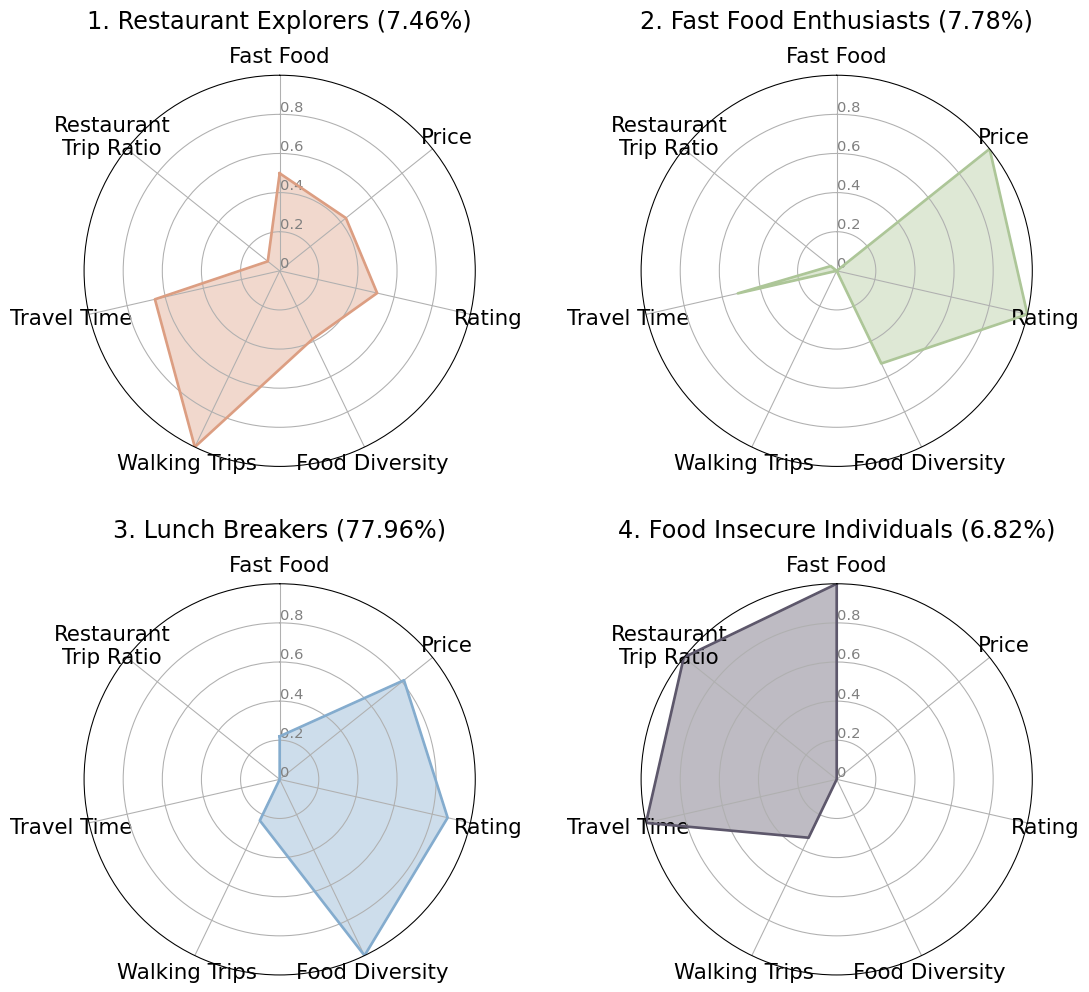

In [ ]:
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(radar_input_norm)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=16)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(np.arange(0,1,0.2), ["0","0.2", "0.4", "0.6", "0.8"], color="grey", size=11)
    plt.ylim(0,1)

    # Ind1
    values=radar_input_norm.loc[row].drop('index').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=18, color="black", y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1100/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = ["#DC9E82", "#ADC698", "#84ACCE", "#5D576B"]
 
# Loop to plot
titles = ["1. Restaurant Explorers (7.46%)", "2. Fast Food Enthusiasts (7.78%)", "3. Lunch Breakers (77.96%)", "4. Food Insecure Individuals (6.82%)"]
for row in range(0, len(radar_input_norm.index)):
    make_spider( row=row, title=titles[row], color=my_palette[row])

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.savefig("figures/radar_color_normed.png", dpi=300)
